In [52]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Definition of Lotka-Volterra System 
## Parameters:
- **$x_{0}=[5, 3]$**
- **$\theta = [2, 1, 4, 1]$**
- **$\theta=[\alpha, \beta, \gamma, \delta]$**
- **States: $x(t)=[S, W]$**

In [53]:
def lotka_volterra_system(state, t, alpha, beta, gamma, delta):
    s, w = state
    dsdt = alpha * s - beta * s * w
    dwdt = delta * s * w - gamma * w
    return [dsdt, dwdt]

In [54]:
alpha = 2
beta = 1
gamma = 4
delta = 1
initial_state = [5, 3]

## Time Points

In [55]:
t = np.linspace(0, 2, 200)
print(t.shape)

(200,)


## Solving the system

In [56]:
solution = odeint(lotka_volterra_system, initial_state, t, args=(alpha, beta, gamma, delta))
print(solution.shape)

(200, 2)


## Sampling Time Points

In [64]:
# t_sub = np.arange(0, 2, 0.2)
# index = np.int_((t_sub / 0.01))
# solution_sampling = solution[index]
# print(solution_sampling)
rng = np.random.RandomState(1)
training_index = rng.choice(np.arange(len(solution)), size=10, replace=False)
t_train, y_train = t[training_index], solution[training_index]

noise_std = 0.5
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

## Plotting

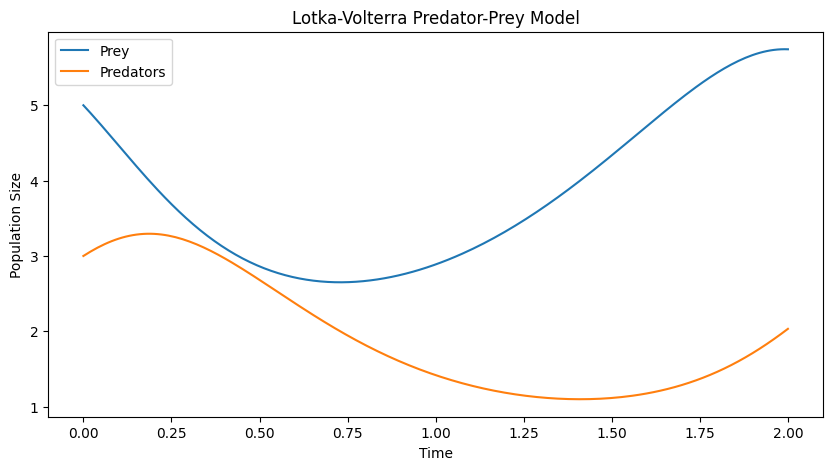

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(t, solution[:, 0], label='Prey')
plt.plot(t, solution[:, 1], label='Predators')
plt.title('Lotka-Volterra Predator-Prey Model')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.show()

## GP approach to inference solutions of LV System

In [29]:
T = t_sub.reshape(-1, 1)
Y = solution_sampling
print(Y.shape)

(10, 2)


In [30]:
kernel = RBF(length_scale_bounds=(1e-6, np.inf))

In [31]:
gp = GaussianProcessRegressor(kernel=kernel)
print(gp)

GaussianProcessRegressor(kernel=RBF(length_scale=1))


In [32]:
gp.fit(T, Y)

GaussianProcessRegressor(kernel=RBF(length_scale=1))

In [33]:
Y_pred, sigma = gp.predict(T, return_std=True)

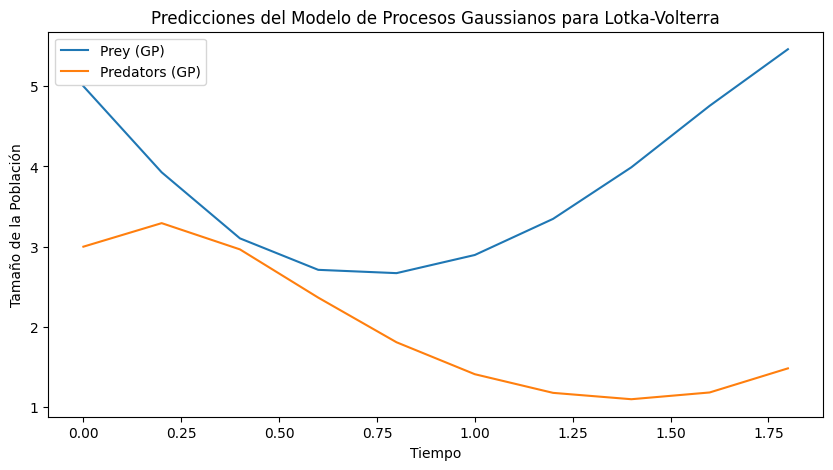

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(T, Y_pred, label=['Prey (GP)', 'Predators (GP)'])
plt.fill_between(T.ravel(), Y_pred[:, 0] - sigma[:, 0], Y_pred[:, 0] + sigma[:, 0], alpha=0.2)
plt.fill_between(T.ravel(), Y_pred[:, 1] - sigma[:, 1], Y_pred[:, 1] + sigma[:, 1], alpha=0.2)
plt.title('Predicciones del Modelo de Procesos Gaussianos para Lotka-Volterra')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.legend()
plt.show()